<a href="https://colab.research.google.com/github/Afsah-Hyder/CV_recitation/blob/main/CV_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#For Q3.
# Specify the proportion of data for the validation set (e.g., 20%)
test_size = 0.2

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train, test_size=test_size, random_state=42
)

170498071/170498071 [==============================] - 3s 0us/step


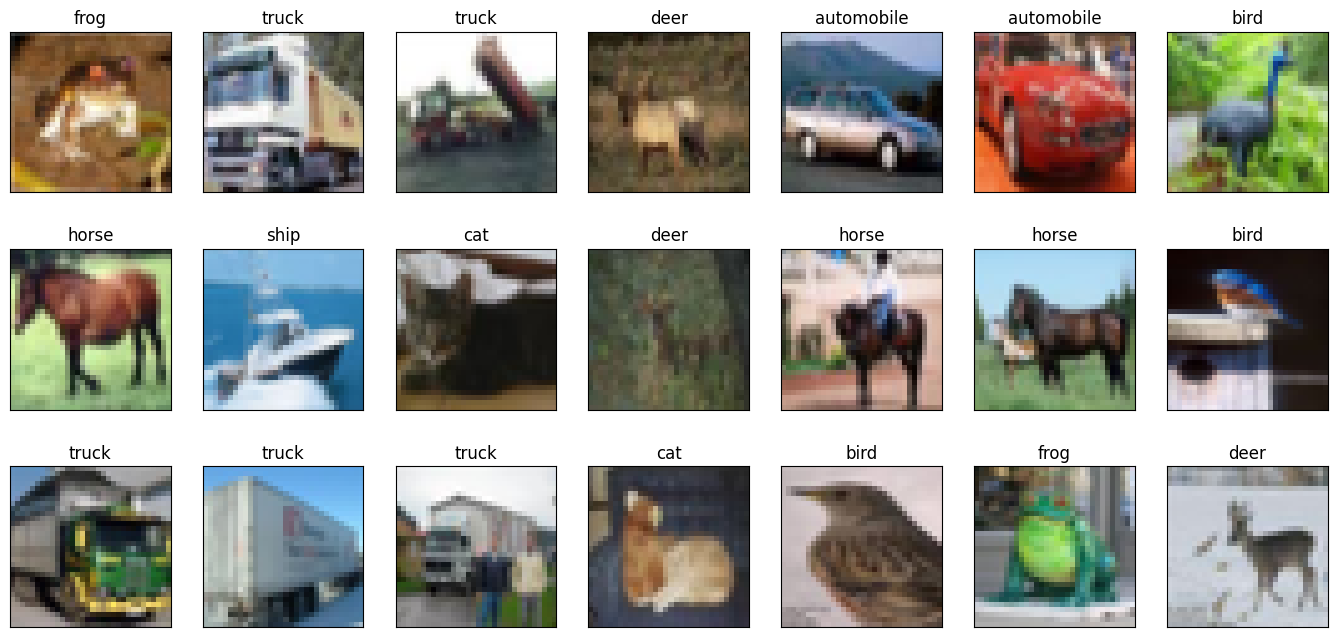

In [ ]:
import matplotlib.pyplot as plt

#Labels taken from the CIFAR-10 dataset webpage
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Displaying some samples of the data
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
  for j in range(7):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(x_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

**CIFAR-10 Dataset:** The dataset contains 60,000 32x32 color (rgb) images categorized into 10 classes. It is a well-known benchmark dataset utilized for training and assessing machine learning algorithms, especially those designed for image recognition. Out of these 60,000 images, 50k are reserved for training and the remaining 10k for test. The 10 classes are: airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each class contains 6k images.


**Preprocessing steps:** In the preprocessing phase of image data, various steps are undertaken to optimize the image for analysis. These steps encompass noise reduction, contrast enhancement, image resizing, color correction, segmentation, feature extraction, among others. Noise reduction methodologies focus on eliminating unwanted elements, such as variations in lighting, while preserving the image's crucial characteristics. Contrast enhancement procedures are employed to heighten the distinction between different features within the image. Image resizing and color correction techniques play roles in adjusting the image's dimensions and color balance, respectively. Segmentation approaches divide the image into distinct regions based on its content, and feature extraction methods identify and extract important features. This preprocessing is vital in image analysis, contributing to improved data quality and reduced visual clutter.

**Q2.**

In [1]:
import numpy as np

def calc(input,filter,padds,padding):
  if padding:
    input=np.pad(input,(padds, padds), constant_values=0)  # diff options available if different type of padding required along diff axis
  output=np.zeros((len(input)-2*padds,len(input)-2*padds))
  for i in range(padds,len(input)-padds):
    for j in range(padds,len(input[i])-padds):
      sum=input[i][j]*filter[padds][padds]
      for k in range(1,padds+1):
        sum+= input[i-k][j-k]*filter[padds-k][padds-k]+ input[i-k][j]*filter[padds-k][padds]+ input[i][j-k]*filter[padds][padds-k]+ input[i+k][j-k]*filter[padds+k][padds-k]+ input[i+k][j]*filter[padds+k][padds]+ input[i][j+k]*filter[padds][padds+k]+ input[i-k][j+k]*filter[padds-k][padds+k]+ input[i+k][j+k]*filter[padds+k][padds+k]
      output[i-padds][j-padds]=sum
  return output


def filt(input,filter,padding,normalization):
  if normalization: filter=filter/np.sum(filter)
  filter_num=len(filter)
  padds=int((filter_num-1)/2)    #pad width
  output_image = np.zeros(input.shape)
  if input.ndim==3:
    output_0=calc(input[0],filter,padds,padding)
    output_1=calc(input[1],filter,padds,padding)
    output_2=calc(input[2],filter,padds,padding)

    for i in range(0,len(output_0)):
      for j in range(0,len(output_0)):
        output_0[i][j]=output_0[i][j]+output_1[i][j]+output_2[i][j]
    return output_0
  elif input.ndim==2:
    output=calc(input,filter,padds,padding)
    return output

Text(0.5, 1.0, 'Grayscale Image')

<Figure size 640x480 with 0 Axes>

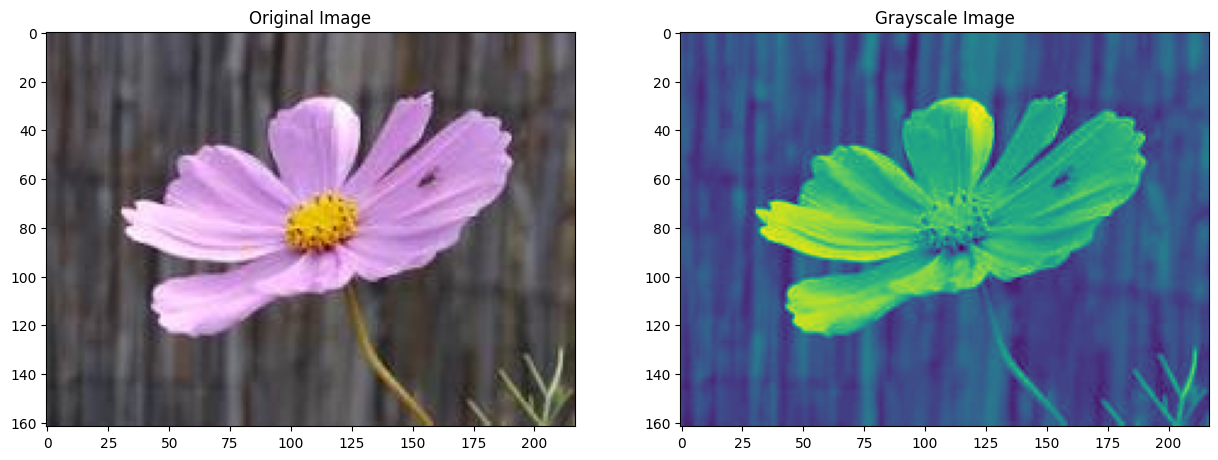

In [15]:
from skimage import io

image_filename = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHpTE3Ntrqa2w0HiNOvTzlpx3vv_MekrmB2wWaQNPEtw&s"
image = io.imread(image_filename)

#Get a grayscaled version of the image
grayscale_image = io.imread(image_filename, as_gray=True)

#Display both the images
plt.figure()
fig, ax = plt.subplots(1, 2, figsize= (15,8))

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(grayscale_image)
ax[1].set_title("Grayscale Image")

In [21]:
# #Defining different filters
# blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

# #Applying the filters on colored image
# blur_image = filt(image, blur, True, False)


# #Applying the filters on grayscale image
# grayscale_blur_image = filt(grayscale_image, blur, True, False)

# #Show the results of filtering on colored images

# plt.figure()

# fig, ax = plt.subplots(1, 2, figsize= (15,8))

# ax[0].imshow(blur_image)
# ax[0].set_title("EdgesBlur Filter Image")

# ax[1].imshow(grayscale_blur_image)
# ax[1].set_title("BlurredFilter Image")

#Defining different filters
sharpen_filter = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])

#Applying the filters on colored image
sharpen_image = filt(image, sharpen_filter, True, False)


#Applying the filters on grayscale image
grayscale_sharpen_image = filt(grayscale_image, sharpen_filter, True, False)

#Show the results of filtering on colored images

plt.figure()

fig, ax = plt.subplots(1, 2, figsize= (15,8))

ax[0].imshow(sharpen_image)
ax[0].set_title("Sharpened Filter Image")

ax[1].imshow(grayscale_sharpen_image)
ax[1].set_title("Sharpened Filter Image")

IndexError: index 162 is out of bounds for axis 0 with size 162

**Q3.** Extract HOG features from the CIFAR-10 dataset, and train a Linear SVM using those features. You are
expected to reach around 45% accuracy on test data using this method.

In [ ]:
from skimage.feature import local_binary_pattern, hog
import cv2
from sklearn.svm import SVC
from os import listdir
from google.colab.patches import cv2_imshow
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
def preprocess(img):
  x_hog=[]
  for i in range(len(img)):
    gray=cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)/255
    Xp,hog_img=hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
    x_hog.append(Xp)
  return x_hog

In [ ]:
width=32
height=32

print("Extract Histogram of Gradients features for training, validation and testing datasets:\n")

Xtrain_d0= preprocess(X_train)
Xval_d0 =preprocess(X_val)
Xtest_d0 = preprocess(x_test)

Extract Histogram of Gradients features for training, validation and testing datasets:



In [ ]:
ytrain=Y_train.reshape(-1)
yval=Y_val.reshape(-1)
ytest=y_test.reshape(-1)
print(ytrain)

[6 2 5 ... 8 8 8]


In [ ]:
def SVM(Xtrain,Ytrain,Xval,Yval):
  print("--------Support Vector Machine--------\n")
  #Define SVM Classifier
  clf = SVC(random_state=0)
  #train the classifier
  clf.fit(Xtrain,Ytrain)
  #Calculate accuracy of the model using validation set
  print("Accuracy Train set",clf.score(Xtrain,Ytrain)*100)
  #Calculate accuracy of the model using validation set
  print("Accuracy Valid set",clf.score(Xval,Yval)*100)
  #plot confusion matrix
  #get_confusion_matrix(clf,Xval,Yval,"Validation")

# Compute and check the classifier for dataset #0:
print("-------- dataset #0--------\n")
SVM(Xtrain_d0,ytrain,Xval_d0,yval)


-------- dataset #0--------

--------Support Vector Machine--------

Accuracy Train set 79.5725
Accuracy Valid set 61.309999999999995


In [ ]:
svm=SVC(random_state=0)
svm.fit(Xtrain_d0,ytrain)
print("Accuracy Test set for SVM: ",svm.score(Xtest_d0,ytest)*100)

Accuracy Test set for SVM:  61.4


**Q4**

In [7]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn.functional as F # Contains all the activation functions
import torch.nn as nn # The Neural Network
import torch.optim as optim # The Optimizer
import torchvision.transforms as transforms # The Tranform to be used
from torch.utils.data import DataLoader # Dataloader

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize

# Download and transform the MNIST dataset
transform = ToTensor()  # Convert data to PyTorch tensors
trainset = datasets.MNIST('./data', train=True, download=True, transform=transform)
testset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Define data loaders for training and testing
trainloader_m = DataLoader(trainset, batch_size=32, shuffle=True)
testloader_m = DataLoader(testset, batch_size=32, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 161957209.14it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33233386.51it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 67628481.43it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 10867386.63it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, RandomHorizontalFlip, RandomVerticalFlip
from torchvision.transforms import v2

# Define preprocessing steps
transform = v2.Compose([
    v2.ToTensor(),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),  # to float32 in [0, 1]
    v2.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # typically from ImageNet
])


batch_size= 100
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader_c = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader_c = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


100%|██████████| 170498071/170498071 [00:06<00:00, 25337870.08it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


a. Create a feed forward neural network consisting of only fully connected layers; the network should have at least
two hidden layers. You are allowed to experiment with regularization techniques and are expected to reach above
55% accuracy on test data

In [ ]:
class FFNN(nn.Module):
    def __init__(self, size):
        super(FFNN, self).__init__()
        if size==784:                  #mnist dataset
          self.layers = nn.Sequential(
              nn.Flatten(),  # Flatten the input from (784,) to (784) for dense layers
              nn.Linear(size,420),  # Use size to define first hidden layer size
              nn.ReLU(inplace=True),  # ReLU activation with inplace modification
              nn.Linear(420,250),
              nn.ReLU(inplace=True),
              nn.Linear(250, 125),
              nn.ReLU(inplace=True),
              nn.Linear(125, 64),
              nn.ReLU(inplace=True),
              nn.Linear(64,32),
              nn.ReLU(inplace=True),
              nn.Linear(32,10),
              nn.Softmax(dim=1),
          )
        elif size==3072:                                #cifar dataset
          self.layers = nn.Sequential(
              nn.Flatten(),  # Flatten the input from (784,) to (784) for dense layers
              nn.Linear(size,1500),  # Use size to define first hidden layer size
              # nn.init.xavier_normal_(self.layers[1].weight),  # Initialize weights after linear layer
              nn.BatchNorm1d(1500),
              nn.ReLU(),  # ReLU activation with inplace modification
              nn.Dropout(0.2),

              nn.Linear(1500,780),
              nn.BatchNorm1d(780),
              nn.ReLU(),
              nn.Dropout(0.1),

              nn.Linear(780,340),
              nn.BatchNorm1d(340),
              nn.ReLU(),
              nn.Dropout(0.1),

              nn.Linear(340,145),
              nn.BatchNorm1d(145),
              nn.ReLU(),
              nn.Dropout(0.1),

              nn.Linear(145, 10),
              nn.Softmax(dim=1),
          )

    def forward(self, x):
        x = self.layers(x)
        return x


In [ ]:
# Define the model, loss function, and optimizer

def run_model(model1,num_epoch,input_size, trainloader,testloader,opt):
  # Training the model
  model = model1
  criterion = nn.CrossEntropyLoss()
  optimizer = opt
  num_epochs = num_epoch
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []

  for epoch in range(num_epochs):
      train_loss = 0.0
      val_loss = 0.0
      correct_train = 0
      correct_val = 0
      total_train = 0
      total_val = 0

      # Training Loop

      for images, labels in trainloader:
          # Reshape images to flatten them
          images = images.view(-1, input_size)

          # Reset gradients
          optimizer.zero_grad()

          # Forward pass: compute predicted outputs by passing inputs to the model
          outputs = model(images)

          # Calculate the loss
          loss = criterion(outputs, labels)

          # Backward pass: compute gradient of the loss with respect to model parameters
          loss.backward()

          # Perform a single optimization step (parameter update)
          optimizer.step()

          # Update training loss
          train_loss += loss.item()

          # Convert output probabilities to predicted class
          _, predicted = torch.max(outputs.data, 1)

          # Total number of labels
          total_train += labels.size(0)

          # Total correct predictions
          correct_train += (predicted == labels).sum().item()


      with torch.no_grad():     # to stop calculating gradients
          for images, labels in testloader:
              images = images.view(-1, input_size) # Reshape images to flatten them
              outputs = model(images)# Forward pass: compute predicted outputs by passing inputs to the model
              loss = criterion(outputs, labels)# Calculate the loss
              val_loss += loss.item()# Update validation loss
              _, predicted = torch.max(outputs.data, 1)# Convert output probabilities to predicted class
              total_val += labels.size(0) # Total number of labels
              correct_val += (predicted == labels).sum().item() # Total correct predictions



      # Compute average training loss and accuracy for the epoch
      train_losses.append(train_loss / len(trainloader))
      train_acc = correct_train / total_train
      train_accs.append(train_acc)

      # Compute average validation loss and accuracy for the epoch
      val_losses.append(val_loss / len(testloader))
      val_acc = correct_val / total_val
      val_accs.append(val_acc)

      # Print training loss and accuracy for the epoch
      print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_acc:.4f}')
      print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_acc:.4f}')

      if val_acc>0.55:
        break

  plt.plot(train_accs, label='Train Accuracy')
  plt.plot(val_accs, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

Epoch [1/5], Training Loss: 1.6926, Training Accuracy: 0.7688
Epoch [1/5], Validation Loss: 1.5459, Validation Accuracy: 0.9166
Epoch [2/5], Training Loss: 1.5374, Training Accuracy: 0.9238
Epoch [2/5], Validation Loss: 1.5282, Validation Accuracy: 0.9330
Epoch [3/5], Training Loss: 1.5285, Training Accuracy: 0.9325
Epoch [3/5], Validation Loss: 1.5283, Validation Accuracy: 0.9329
Epoch [4/5], Training Loss: 1.5278, Training Accuracy: 0.9331
Epoch [4/5], Validation Loss: 1.5389, Validation Accuracy: 0.9222
Epoch [5/5], Training Loss: 1.5306, Training Accuracy: 0.9304
Epoch [5/5], Validation Loss: 1.5318, Validation Accuracy: 0.9292


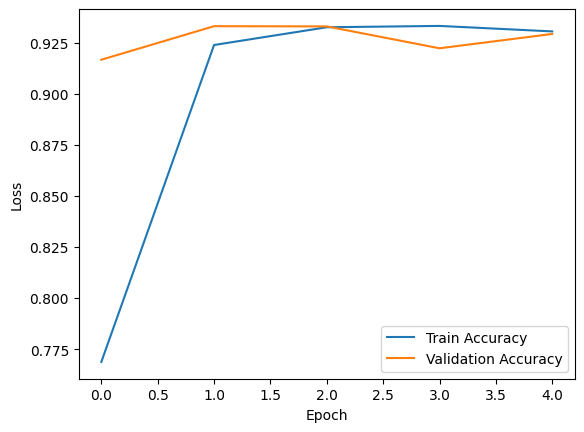

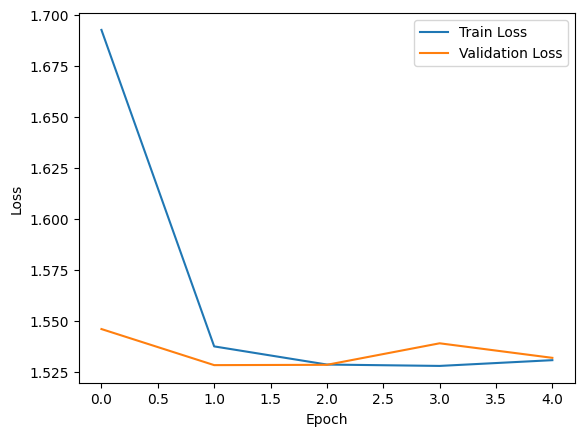

In [ ]:
# FOR MNIST

  #     Ran on 5 epochs to speed things up, this will get a better accuracy for more epochs
model1=FFNN(784)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
run_model(model1, 5, 28*28,trainloader_m, testloader_m,optimizer)

Epoch [1/100], Training Loss: 2.0909, Training Accuracy: 0.3675
Epoch [1/100], Validation Loss: 2.0427, Validation Accuracy: 0.4170
Epoch [2/100], Training Loss: 2.0340, Training Accuracy: 0.4222
Epoch [2/100], Validation Loss: 2.0194, Validation Accuracy: 0.4379
Epoch [3/100], Training Loss: 2.0108, Training Accuracy: 0.4464
Epoch [3/100], Validation Loss: 2.0040, Validation Accuracy: 0.4523
Epoch [4/100], Training Loss: 1.9955, Training Accuracy: 0.4619
Epoch [4/100], Validation Loss: 2.0004, Validation Accuracy: 0.4548
Epoch [5/100], Training Loss: 1.9829, Training Accuracy: 0.4746
Epoch [5/100], Validation Loss: 1.9797, Validation Accuracy: 0.4758
Epoch [6/100], Training Loss: 1.9726, Training Accuracy: 0.4847
Epoch [6/100], Validation Loss: 1.9765, Validation Accuracy: 0.4815
Epoch [7/100], Training Loss: 1.9650, Training Accuracy: 0.4915
Epoch [7/100], Validation Loss: 1.9833, Validation Accuracy: 0.4728
Epoch [8/100], Training Loss: 1.9564, Training Accuracy: 0.5019
Epoch [8/100

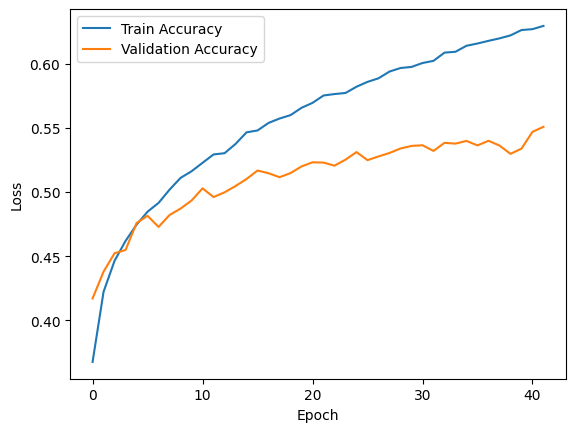

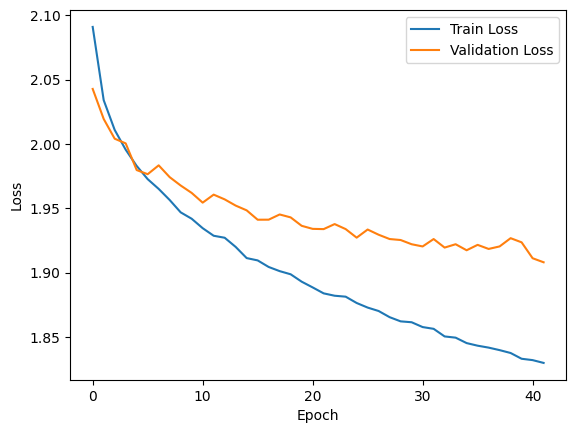

In [ ]:
# FOR CIFAR10

model1=FFNN(3072)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
run_model(model1,100,32*32*3,trainloader_c,testloader_c,optimizer)
#automatically stop training once val accuracy is above 55%

b. Create a convolutional neural network consisting of at least two convolutional layers. You are allowed to
experiment with regularization techniques and are expected to reach above 75% accuracy on test data.

In [6]:
class CNNModel(nn.Module):
  def __init__(self,size):
    super(CNNModel, self).__init__()
    if size==784:
      self.conv_layers = nn.Sequential(

          nn.Conv2d(1, 32, kernel_size=3, padding=1),  # Input channel = 1 (grayscale)
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),

          nn.Conv2d(32, 64, kernel_size=3, padding=1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )
      self.fc_layers = nn.Sequential(
          nn.Flatten(),
          nn.Linear(64 * 7 * 7, 512),  # Calculate output size based on input dimensions
          nn.ReLU(inplace=True),
          nn.Linear(512, 10),
          nn.Softmax(dim=1)  # Apply softmax for probability distribution
      )
    elif size==3072:
      self.conv_layers = nn.Sequential(
          nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Input channel = 3 (RGB)
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),

          nn.Conv2d(32, 64, kernel_size=3, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),     # output= 64*16*16

          nn.Conv2d(64, 128, kernel_size=3, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),     # output= 128*4*4
      )
      self.fc_layers = nn.Sequential(
          nn.Flatten(),
          nn.Linear(128 * 4 * 4, 512),  # Calculate output size based on input dimensions
          nn.BatchNorm1d(512),
          nn.ReLU(),
          nn.Dropout(0.1),

          nn.Linear(512,145),
          nn.BatchNorm1d(145),
          nn.ReLU(),
          nn.Dropout(0.1),

          nn.Linear(145, 10),
          nn.Softmax(dim=1),
      )
  def forward(self, x):
    x = self.conv_layers(x)
    x = self.fc_layers(x)
    return x

In [10]:
def run_cnn(model,num_epoch,input_size, trainloader,testloader,optimizer):
  criterion = nn.CrossEntropyLoss()
  train_losses, train_accuracies = [], []
  val_losses, val_accuracies = [], []
  for epoch in range(num_epoch):
      if epoch < 10:
          learning_rate = 0.01
      else:
          learning_rate = 0.001
      for param_group in optimizer.param_groups:
          param_group['lr'] = learning_rate
      # Training phase
      model.train()  # Set model to training mode
      total_loss, total_correct = 0, 0
      for data, target in trainloader:
          # Clear gradients from previous iteration
          optimizer.zero_grad()

          # Forward pass
          output = model(data)

          # Compute loss
          loss = criterion(output, target.long())  # Convert target to long for cross entropy

          # Backpropagation
          loss.backward()

          # Update weights
          optimizer.step()

          # Calculate training accuracy within the loop (optional)
          predicted = torch.argmax(output, dim=1)
          total_correct += (predicted == target).sum().item()
          total_loss += loss.item()

      # Calculate training accuracy
      train_acc = total_correct / len(trainloader.dataset)
      train_losses.append(total_loss / len(trainloader))
      train_accuracies.append(train_acc)

      # Validation phase (optional)
      with torch.no_grad():  # Disable gradient calculation for validation
          model.eval()  # Set model to evaluation mode
          val_loss, val_correct = 0, 0
          for data, target in testloader:
              output = model(data)
              val_loss += criterion(output, target.long()).item()
              predicted = torch.argmax(output, dim=1)
              val_correct += (predicted == target).sum().item()

          # Calculate and print validation metrics
          val_acc = val_correct / len(testloader.dataset)
          val_losses.append(val_loss / len(testloader))
          val_accuracies.append(val_acc)
          print(f"Epoch: {epoch+1}, Training Loss: {total_loss/len(trainloader):.4f}, Training Accuracy: {train_acc:.4f}, Validation Loss: {val_loss/len(testloader):.4f}, Validation Accuracy: {val_acc:.4f}")

      if val_acc>0.75:
        break

      # if (epoch + 1) % 5 == 0:
      #       torch.save(best_model_wts, f"model_{epoch+1}.pth")

  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

Epoch: 1, Training Loss: 2.2622, Training Accuracy: 0.3213, Validation Loss: 1.9687, Validation Accuracy: 0.6186
Epoch: 2, Training Loss: 1.7483, Training Accuracy: 0.7448, Validation Loss: 1.6606, Validation Accuracy: 0.8143
Epoch: 3, Training Loss: 1.6418, Training Accuracy: 0.8291, Validation Loss: 1.6290, Validation Accuracy: 0.8389
Epoch: 4, Training Loss: 1.6263, Training Accuracy: 0.8398, Validation Loss: 1.6168, Validation Accuracy: 0.8494
Epoch: 5, Training Loss: 1.6174, Training Accuracy: 0.8479, Validation Loss: 1.6085, Validation Accuracy: 0.8554


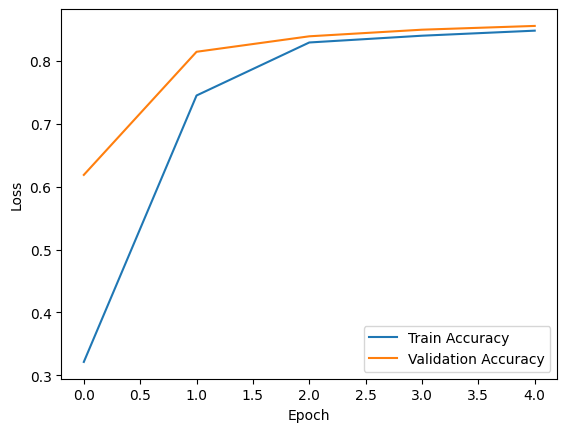

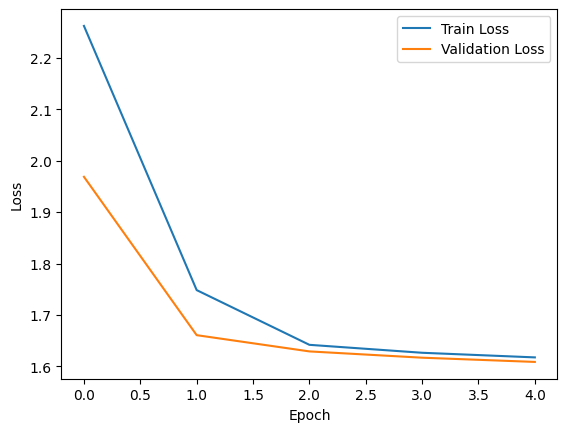

In [ ]:
model1=CNNModel(784)
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)  # Adjust learning rate as needed
run_cnn(model1, 5, 28*28,trainloader_m, testloader_m,optimizer)

Epoch: 1, Training Loss: 2.1030, Training Accuracy: 0.3925, Validation Loss: 1.9996, Validation Accuracy: 0.4844
Epoch: 2, Training Loss: 1.9481, Training Accuracy: 0.5380, Validation Loss: 1.9011, Validation Accuracy: 0.5806
Epoch: 3, Training Loss: 1.8701, Training Accuracy: 0.6151, Validation Loss: 1.8561, Validation Accuracy: 0.6193
Epoch: 4, Training Loss: 1.8225, Training Accuracy: 0.6573, Validation Loss: 1.7995, Validation Accuracy: 0.6761
Epoch: 5, Training Loss: 1.7817, Training Accuracy: 0.7019, Validation Loss: 1.7760, Validation Accuracy: 0.7048
Epoch: 6, Training Loss: 1.7540, Training Accuracy: 0.7276, Validation Loss: 1.7696, Validation Accuracy: 0.7059
Epoch: 7, Training Loss: 1.7321, Training Accuracy: 0.7475, Validation Loss: 1.7371, Validation Accuracy: 0.7400
Epoch: 8, Training Loss: 1.7167, Training Accuracy: 0.7597, Validation Loss: 1.7419, Validation Accuracy: 0.7309
Epoch: 9, Training Loss: 1.6999, Training Accuracy: 0.7768, Validation Loss: 1.7306, Validation 

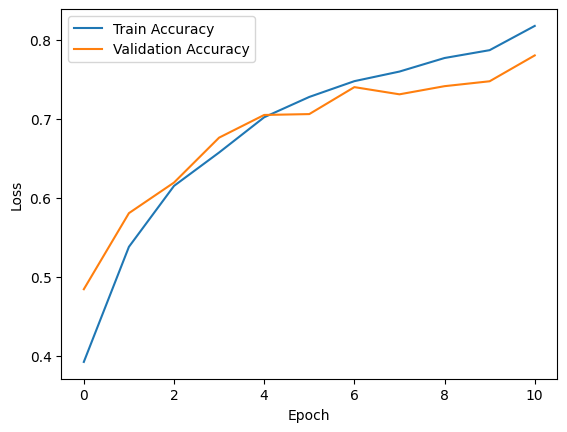

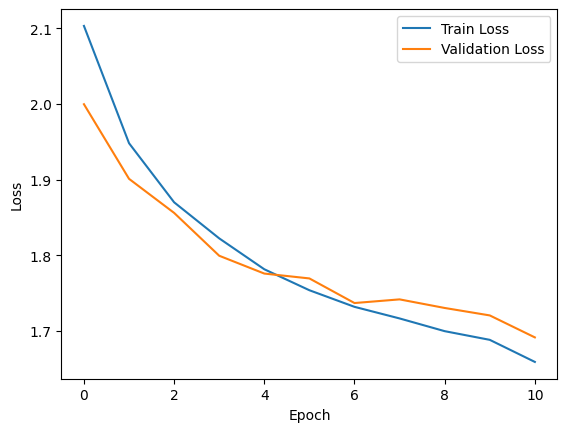

In [11]:
model1=CNNModel(3072)
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01, momentum=0.7)  # Adjust learning rate as needed
run_cnn(model1, 100, 3*32*32,trainloader_c, testloader_c,optimizer)
#will stop automatically once val_accuracy reaches 75%

c. Use the pre-trained VGG-16 network (trained on ImageNet) as a feature extractor, and connect it to a feed
forward network consisting of fully connected layers. You should try to fine tune the network and are expected
to reach above 65% accuracy on test data

In [ ]:
def preprocess_mnist_image(mnist_image):
  # Reshape to add channel dimension
  mnist_image = np.expand_dims(mnist_image, axis=-1)

  # Resize to match VGG16 input size
  img = image.array_to_img(mnist_image, scale=False)  # Avoid normalization
  img = img.resize((224, 224), interpolation=image.BICUBIC)  # Experiment with interpolation
  img = image.img_to_array(img)

  # Optional: Replicate channel (consider alternative preprocessing for grayscale)
  img = np.repeat(img, 3, axis=-1)

  return preprocess_input(img)[np.newaxis, ...]  # Add batch dimension and preprocess

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.vgg16 import preprocess_input

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to add a channel dimension (optional, padding might be preferred)
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Alternatively, pad with zeros (might distort aspect ratio)
x_train = np.pad(x_train, ((0, 0), (48, 48), (48, 48)), mode='constant')
x_test = np.pad(x_test, ((0, 0), (48, 48), (48, 48)), mode='constant')

# Normalize (consider alternative scaling for MNIST)
x_train = x_train.astype('float32') / 255  # Simple scaling to 0-1
x_test = x_test.astype('float32') / 255

# VGG-16 expects RGB, comment out if using padding instead of reshaping
# x_train = np.repeat(x_train, 3, axis=3)  # Duplicate channel for RGB
# x_test = np.repeat(x_test, 3, axis=3)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
# Create a new model using only the feature extraction part of VGG-16
feature_extractor = Model(inputs=model.input, outputs=model.output)

In [ ]:
x = feature_extractor.output  # Input to the FFNN is the output from the feature extractor

# Add a Flatten layer to convert the feature maps into a 1D vector
x = Flatten()(x)
num_classes=10
# Add Dense layers for classification (adjust the number of neurons and activation functions as needed)
x = Dense(units=1024, activation='relu')(x)  # Example dense layer
x = Dense(units=512, activation='relu')(x)  # Example dense layer
x = Dense(units=256, activation='relu')(x)  # Example dense layer
x = Dense(units=128, activation='relu')(x)  # Example dense layer
x = Dense(units=64, activation='relu')(x)  # Example dense layer
x = Dense(units=num_classes, activation='softmax')(x)  # Output layer with softmax for multi-class classification

# Replace 'num_classes' with the number of classes in your classification problem
# Adjust the number of Dense layers, units, and activation functions based on your task complexity

# Create the final model by combining the feature extractor and FFNN
model2 = Model(inputs=feature_extractor.input, outputs=x)

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

PYTORCH IMPLEMENTATION

In [ ]:
import torch
from torch import nn
import torchvision
import os
from torchvision.datasets import VisionDataset
import torchvision.models as models

In [ ]:
vgg16 = torchvision.models.vgg16_bn(weights=None)
#print(vgg16)

In [6]:
from torch.utils.data import DataLoader # Dataloader

from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, RandomHorizontalFlip, RandomVerticalFlip
from torchvision.transforms import v2

# Define preprocessing steps
transform = v2.Compose([
    v2.Resize((224, 224)),  # Resize images to match VGG input size
    v2.Grayscale(num_output_channels=3),  # since VGG takes 3 channel input
    v2.ToTensor(),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),  # to float32 in [0, 1]
    v2.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # typically from ImageNet
])


batch_size= 100
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
class VGGFeatureExtractor(nn.Module):
  def __init__(self):
    super(VGGFeatureExtractor, self).__init__()
    model = torchvision.models.vgg16(weights=torchvision.models.VGG16_Weights.IMAGENET1K_V1)
    self.features = model.features

    # Freeze weights of pre-trained features
    for layer in self.features.parameters():
      layer.requires_grad = False

    # Define your custom classifier layers for 10 classes
    self.classifier = nn.Sequential(
        nn.Linear(in_features=512, out_features=256),  # Adjust hidden layer size if needed
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(p=0.1),

        nn.Linear(in_features=256, out_features=64),  # Adjust hidden layer size if needed
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.1),

        nn.Linear(in_features=64, out_features=10),
        nn.LogSoftmax(dim=1)  # Output layer for 10 classes (log softmax for multi-class classification)
    )

  def forward(self, x):
    x = self.features(x)  # Extract features using pre-trained VGG16
    x = nn.AdaptiveAvgPool2d(output_size=(1, 1))(x)
    # if self.extract_features:
    #   return x  # Return extracted features for further processing (optional)
    # x = self.avgpool(x)  # Global average pooling
    x = torch.flatten(x, 1)  # Flatten features before feeding to classifier
    x = self.classifier(x)
    return x


In [10]:

def run_vgg(model,num_epoch,train_loader,test_loader):
  # Define optimizer and loss function
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.7)  # Adjust learning rate as needed
  criterion = nn.CrossEntropyLoss()  # Equivalent to categorical_crossentropy

  # Training loop with loss and accuracy tracking
  train1_losses, train1_accs, test1_losses, test1_accs = [], [], [], []

  # Training Loop
  for epoch in range(num_epoch):
      # Training phase
      if epoch < 10:
          learning_rate = 0.01
      else:
          learning_rate = 0.001
      for param_group in optimizer.param_groups:
          param_group['lr'] = learning_rate
      model.train()  # Set model to training mode
      total_loss, total_correct = 0, 0
      for data, target in trainloader:
          # Clear gradients from previous iteration
          optimizer.zero_grad()

          # Forward pass
          output = model(data)

          # Compute loss
          loss = criterion(output, target.long())  # Convert target to long for cross entropy

          # Backpropagation
          loss.backward()

          # Update weights
          optimizer.step()

          # Calculate training accuracy within the loop (optional)
          predicted = torch.argmax(output, dim=1)
          total_correct += (predicted == target).sum().item()
          total_loss += loss.item()

      # Calculate training accuracy
      train_acc = total_correct / len(trainloader.dataset)
      train1_losses.append(total_loss / len(trainloader))
      train1_accs.append(train_acc)

      # Validation phase (optional)
      with torch.no_grad():  # Disable gradient calculation for validation
          model.eval()  # Set model to evaluation mode
          val_loss, val_correct = 0, 0
          for data, target in testloader:
              output = model(data)
              val_loss += criterion(output, target.long()).item()
              predicted = torch.argmax(output, dim=1)
              val_correct += (predicted == target).sum().item()

          # Calculate and print validation metrics
          val_acc = val_correct / len(testloader.dataset)
          test1_losses.append(val_loss / len(testloader))
          test1_accs.append(val_acc)
          print(f"Epoch: {epoch+1}, Training Loss: {total_loss/len(trainloader):.4f}, Training Accuracy: {train_acc:.4f}, Validation Loss: {val_loss/len(testloader):.4f}, Validation Accuracy: {val_acc:.4f}")

      if val_acc>0.85:
          break

        # if (epoch + 1) % 5 == 0:
        #       torch.save(best_model_wts, f"model_{epoch+1}.pth")

  plt.plot(train1_accs, label='Train Accuracy')
  plt.plot(test1_accs, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(train1_losses, label='Train Loss')
  plt.plot(test1_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
model1 = VGGFeatureExtractor()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01, momentum=0.7)  # Adjust learning rate as needed
run_cnn(model1, 100,trainloader_c, testloader_c,optimizer)